In [2]:
import sys 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid.inset_locator import inset_axes
sys.path.append('D:\PycQED')
from collections import OrderedDict as od
# from pycqed.analysis import measurement_analysis as MA 
# from pycqed.analysis import analysis_toolbox as a_tools
# import pycqed.analysis_v2.spectroscopy_analysis as ma2
# from pycqed.analysis import fitting_models as fit_mods
from scipy import constants
from scipy import optimize
import scipy
import math
import ipywidgets
import pandas as pd
import sympy
%matplotlib inline
# print(savedir)

C:\Users\thijs\AppData\Local\Temp\ipykernel_3976\4119053414.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


In [3]:
# v_phi = 
B = 10e6
min_omega_k = 0
max_omega_k = 10e9
omega_k = 5e9
omega_kn = 5.5e9
gamma = 1e-3


eps = 5e-3
N_feedline = 20
gamma_N = gamma/N_feedline

In [5]:
D = np.diag(np.ones(N_feedline+1))
D[1:,0] = np.ones(N_feedline)*eps
D[0,1:] = np.ones(N_feedline)*gamma_N
B = np.linalg.inv(D)
diag = np.zeros(N_feedline+1)
diag[0] = omega_kn**2
diag[1:] = np.linspace(min_omega_k,max_omega_k,N_feedline)**2
A = np.diag(-1*diag)
print(A)
C = np.matmul(B, A)
C
# D
# A = 
# A

[[-3.02500000e+19  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.77008310e+17  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.0

array([[-3.02501513e+19,  0.00000000e+00,  1.38504848e+13,
         5.54019391e+13,  1.24654363e+14,  2.21607756e+14,
         3.46262119e+14,  4.98617452e+14,  6.78673753e+14,
         8.86431025e+14,  1.12188927e+15,  1.38504848e+15,
         1.67590866e+15,  1.99446981e+15,  2.34073193e+15,
         2.71469501e+15,  3.11635907e+15,  3.54572410e+15,
         4.00279010e+15,  4.48755706e+15,  5.00002500e+15],
       [ 1.51250756e+17,  0.00000000e+00, -6.92524238e+10,
        -2.77009695e+11, -6.23271814e+11, -1.10803878e+12,
        -1.73131060e+12, -2.49308726e+12, -3.39336877e+12,
        -4.43215512e+12, -5.60944633e+12, -6.92524238e+12,
        -8.37954328e+12, -9.97234903e+12, -1.17036596e+13,
        -1.35734751e+13, -1.55817954e+13, -1.77286205e+13,
        -2.00139505e+13, -2.24377853e+13, -2.50001250e+13],
       [ 1.51250756e+17,  0.00000000e+00, -2.77008380e+17,
        -2.77009695e+11, -6.23271814e+11, -1.10803878e+12,
        -1.73131060e+12, -2.49308726e+12, -3.39336877e

In [6]:
np.sqrt(-9.+0j)

3j

In [7]:
w,v = np.linalg.eig(C)
print(w)
print(v)
w2 = np.sqrt(np.array(w,dtype='complex'))
print(w2)


[ 0.00000000e+00 -1.00000036e+20 -8.97507264e+19 -8.00554338e+19
 -7.09141583e+19 -6.23269001e+19 -5.42936595e+19 -4.68144375e+19
 -3.98892379e+19 -3.35180915e+19 -3.02500707e+19 -2.77007558e+19
 -2.24376570e+19 -1.77285256e+19 -1.35734044e+19 -9.97229794e+18
 -6.92520724e+18 -2.77008310e+17 -1.10803323e+18 -2.49307474e+18
 -4.43213277e+18]
[[ 0.00000000e+00 -7.16856149e-05  7.54206841e-05  8.03689144e-05
   8.71956299e-05  9.71530436e-05  1.12907218e-04  1.41311141e-04
   2.06912636e-04  5.12817839e-04 -9.96552871e-01 -5.43304294e-04
  -1.43603401e-04  7.07923903e-05 -4.06959455e-05  2.45893131e-05
  -1.48451618e-05  4.62096531e-07  1.90109548e-06 -4.49090573e-06
  -8.58345991e-06]
 [ 1.00000000e+00  3.58428074e-07 -3.77103421e-07 -4.01844572e-07
  -4.35978149e-07 -4.85765218e-07 -5.64536091e-07 -7.06555703e-07
  -1.03456318e-06 -2.56408919e-06  4.98276436e-03  2.71652147e-06
   7.18017004e-07 -3.53961952e-07  2.03479727e-07 -1.22946565e-07
   7.42258089e-08 -2.31048266e-09 -9.5054774

In [8]:
times = np.arange(0,2e-9,0.01e-9)
cavity_vals = []
t0 = np.zeros(N_feedline+1)
t0[10] = 1
for t in times:
    cavity_vals.append(np.abs(np.matmul(MatrixExp(w2,v,t),t0)))


NameError: name 'MatrixExp' is not defined

In [9]:
print(np.array(cavity_vals)[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [10]:
def MatrixExp(w,v,t):
    Wexp = np.diag(np.exp(w)*t)
#     print(Wexp)
    Vinv = np.linalg.inv(v)
    VWexp = np.matmul(v, Wexp)
    return np.matmul(VWexp,Vinv)

In [11]:
for ii in range(4):
    plt.plot(times,np.array(cavity_vals)[:,ii])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [64]:
t, tau, omega = sympy.symbols('t tau omega')
s0, sc = sympy.symbols('s0 sc')

In [36]:
sympy.integrate(sympy.exp(tau)*sympy.exp(1j*omega*(t-tau)), (tau,-t,0))

-I*exp(-t)*exp(1.0*I*omega*t)/(omega*exp(-1.0*I*omega*t) + I*exp(-1.0*I*omega*t)) + I*exp(1.0*I*omega*t)/(omega + I)

In [80]:
m = sympy.Matrix([[0,0,0,0],
                 [-s0,-1,0,sc],
                 [sc,0,-1,-s0],
                 [0,0,0,0]])

In [81]:
m.nullspace()

[Matrix([
 [  1/sc],
 [-s0/sc],
 [     1],
 [     0]]),
 Matrix([
 [         s0/sc],
 [-s0**2/sc + sc],
 [             0],
 [             1]])]

In [79]:
m.echelon_form()

Matrix([
[-s0, -1,  0,            sc],
[  0, sc, s0, s0**2 - sc**2],
[  0,  0,  0,             0],
[  0,  0,  0,             0]])

In [29]:
sympy.integrate(sympy.sin(t**2), (t, -np.inf, np.inf))

sqrt(2)*sqrt(pi)/2

In [12]:
z = np.linspace(-5,15, 200)
t = np.linspace(0,10,100)
c = 1
# fz = np.exp(-(z-c*t)**2)



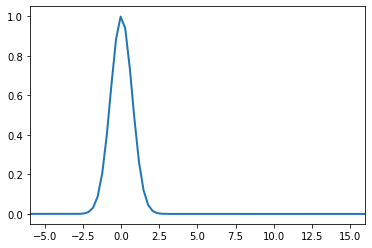

In [49]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
# for the animation

z = np.linspace(-5,15, 200)
t = np.linspace(0,10,100)
c = 4

fig = plt.figure()
axis = plt.axes()

z = np.linspace(-5,15, 200)
y = np.exp(-(z)**2)

line, = axis.plot(z,y, lw = 2)

# what will our line datase
# contain?
def init():
    z = np.linspace(-10,50, 200)
    y = np.exp(-(z)**2)
    line.set_data(z,y)
    return line,

# initializing empty value
# for x and y co-ordinates


# animation function
def animate(i):
    line.set_data(z, np.exp(-(z-c*i)**2))
    return line,
anim = animation.FuncAnimation(fig, animate, init_func = init,
                               frames = t, interval = 50, blit = True)


plt.show()

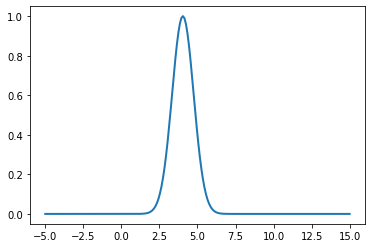

In [14]:
fig = plt.figure()
axis = plt.axes()

line, = axis.plot(z,y, lw = 2)
y = np.exp(-(z-c*t[0])**2)
line.set_data(z,y)
y = np.exp(-(z-c*t[10])**2)
line.set_data(z,y)
# axis.plot(z, np.exp(-(z-c*t[0])**2))
plt.show()

C:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


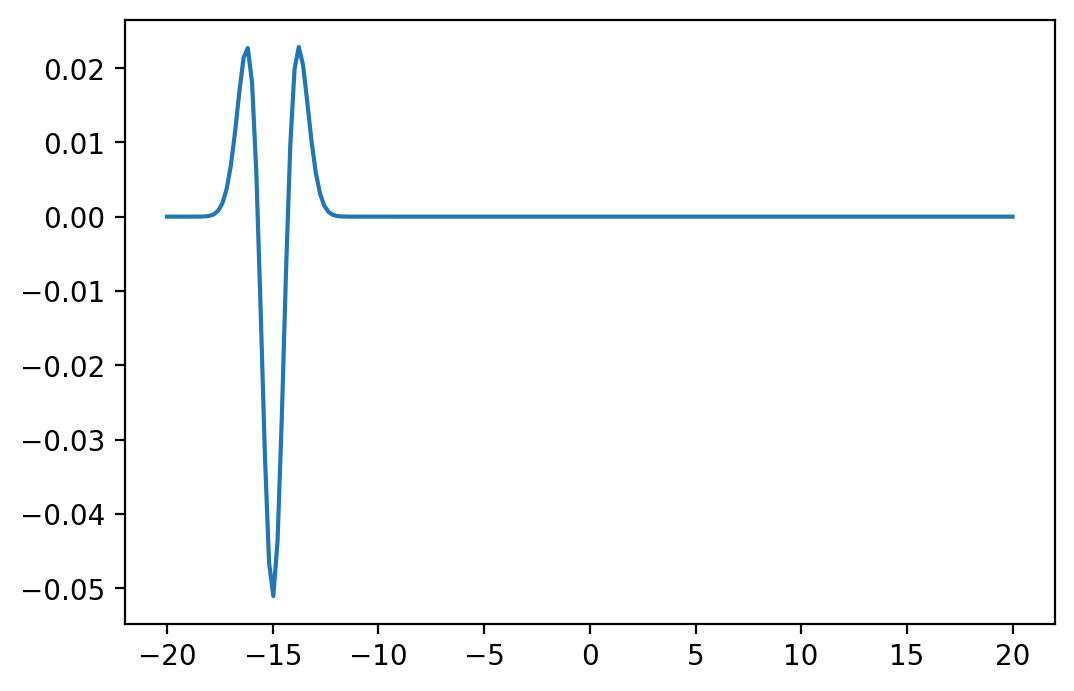

In [9]:
z = np.linspace(-20,20,200)
y = np.exp(-(z+15)**2)
A = np.fft.fft(y)
k = np.fft.fftfreq(200,40/200)

fig,ax = plt.subplots(1,1,dpi=200)
ax.plot(z,np.fft.ifft(-1*k**2*A))

In [16]:
z.size

200

C:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


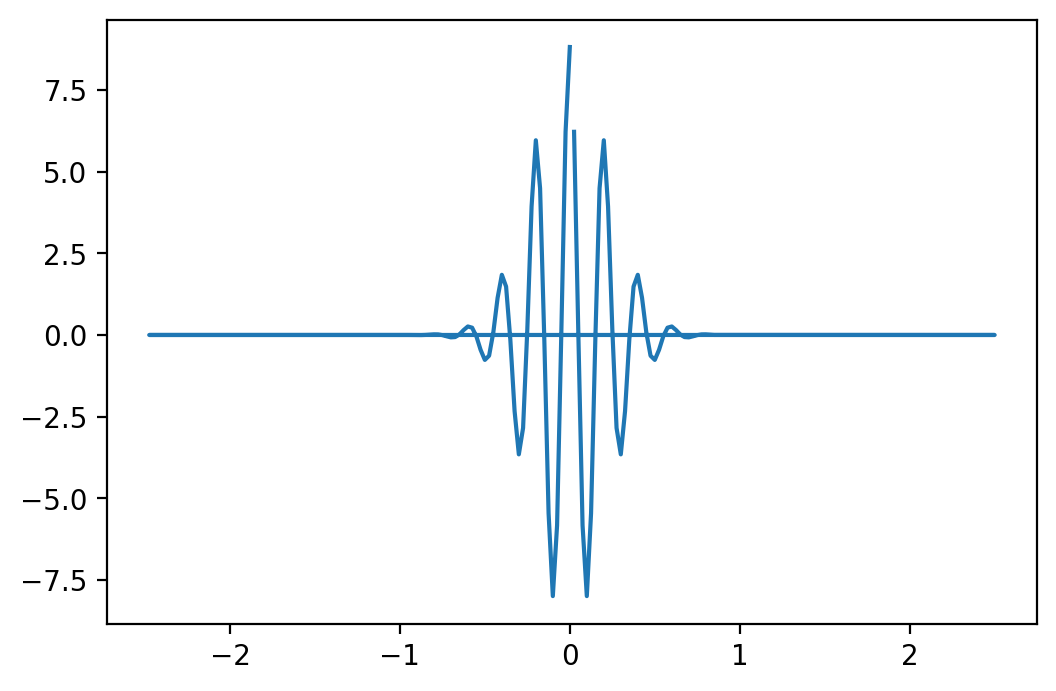

In [17]:

k = np.fft.fftfreq(200,d=40/200)
B = np.fft.fft(y)
# k = np.arange()
fig,ax = plt.subplots(1,1,dpi=200)
ax.plot(-k,B)
# plt.plot(np.fft.fftfreq(200,d=40/200), )

C:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


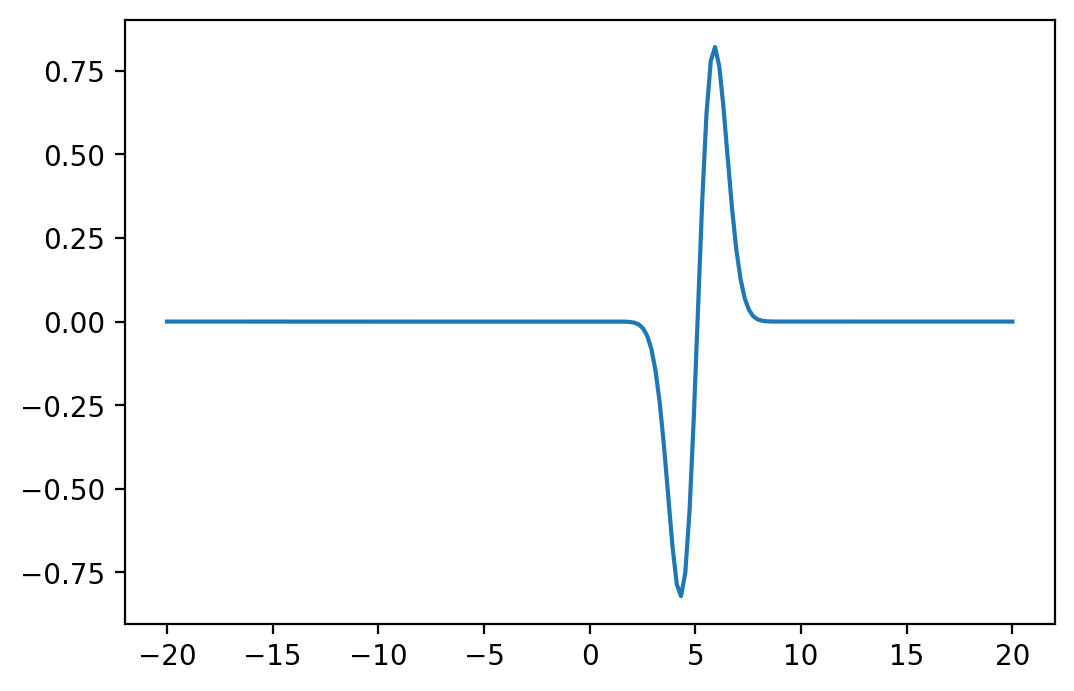

In [18]:
c = 4
t=5.15
k = np.fft.fftfreq(200,d=40/200)
# B = np.fft.fft(y)
W = np.fft.ifft(B*np.exp(-1j*2*np.pi*c*k*t)-B*np.exp(1j*2*np.pi*c*k*t))
fig,ax = plt.subplots(1,1,dpi=200)
ax.plot(z,W)

In [19]:
int(len(k)/2)

100

In [20]:
Zcinv

NameError: name 'Zcinv' is not defined

In [21]:
z1>0

NameError: name 'z1' is not defined

C:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


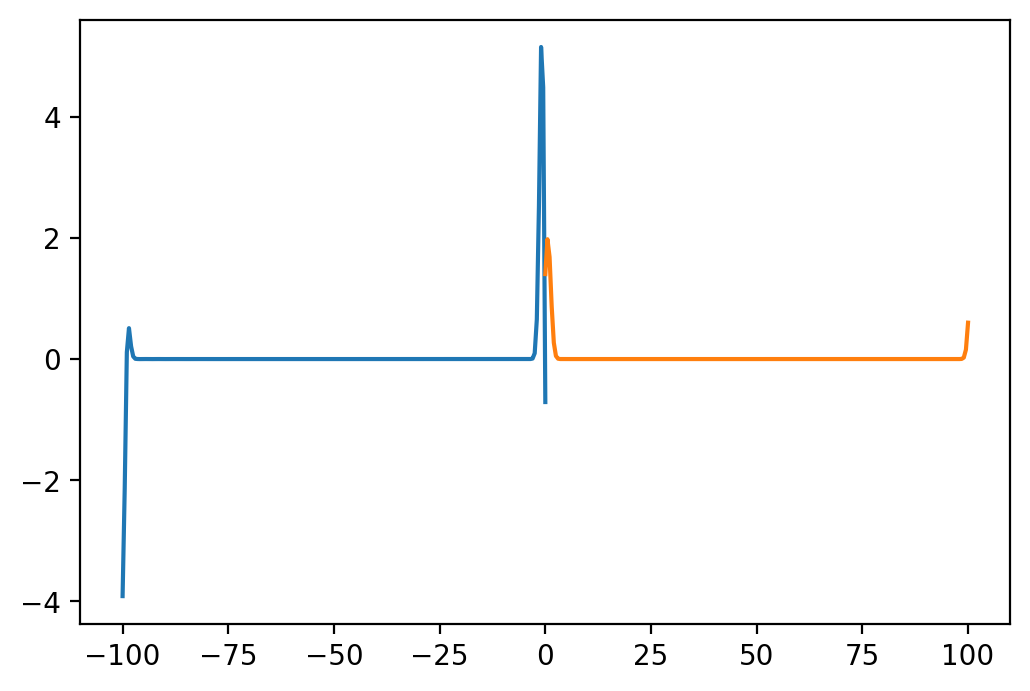

In [22]:
z1 = np.linspace(-100,0,200)
z2 = np.linspace(0,100,200)
y1 = np.exp(-(z1+15)**2)
y2 = np.exp(-(z2+15)**2)

k = np.fft.fftfreq(200,d=100/200)
Z0 = 50
c = 4
t=4
Cap = 1e-3

Zcinv = 1j*c*k*Cap
s0 = Z0*Zcinv/(1+Z0*Zcinv)
sc = 1/(1+Z0*Zcinv)


# [:int(len(k)/2)]
# Y1 = np.fft.fft(y1)



A1l = np.fft.fft(y1)
A1r = np.fft.fft(y2*np.conjugate(sc))

A2l = np.fft.ifft(-y1*np.conjugate(s0))

B1r = np.fft.fft(-np.conjugate(-s0*y2))
B2l = np.fft.ifft(np.conjugate(sc)*y1)
B2r = np.fft.ifft(y2)

A1 = A1l + A1r

A2 = A2l

B1 = B1r

B2 = B2l+B2r
WA1L = np.fft.ifft(A1l*np.exp(-1j*2*np.pi*c*k*t)) + np.fft.fft(-s0*A1l*np.exp(-1j*2*np.pi*c*k*t))
WA1R = np.fft.ifft(A1r*np.exp(-1j*2*np.pi*c*k*t)*sc)

WA2l = np.fft.ifft(A2l*np.exp(1j*2*np.pi*c*k*t)) + np.fft.fft(-s0*A2l*np.exp(1j*2*np.pi*c*k*t))
WA2r = np.fft.ifft(A2l*np.exp(1j*2*np.pi*c*k*t)*sc)

WB1r = np.fft.fft(B1r*np.exp(-1j*2*np.pi*c*k*t)) + np.fft.ifft(-s0*B1r*np.exp(-1j*2*np.pi*c*k*t))

WB2l = np.fft.fft(B2l*np.exp(1j*2*np.pi*c*k*t)*sc)
WB2r = np.fft.fft(B2r*np.exp(1j*2*np.pi*c*k*t)) + np.fft.ifft(-s0*B2r*np.exp(1j*2*np.pi*c*k*t))
# B = np.fft.fft(y)
# k1 = np.fft.fftfreq(100,d=20/100)


WA1L = np.fft.ifft(A1*np.exp(-1j*2*np.pi*c*k*t)) + np.fft.fft(-s0*A1*np.exp(-1j*2*np.pi*c*k*t))
WA1R = np.fft.ifft(A1*np.exp(-1j*2*np.pi*c*k*t)*sc)

WA2l = np.fft.ifft(A2*np.exp(1j*2*np.pi*c*k*t)) + np.fft.fft(-s0*A2*np.exp(1j*2*np.pi*c*k*t))
WA2r = np.fft.ifft(A2*np.exp(1j*2*np.pi*c*k*t)*sc)

WB1r = np.fft.fft(B1*np.exp(-1j*2*np.pi*c*k*t)) + np.fft.ifft(-s0*B1*np.exp(-1j*2*np.pi*c*k*t))

WB2l = np.fft.fft(B2*np.exp(1j*2*np.pi*c*k*t)*sc)
WB2r = np.fft.fft(B2*np.exp(1j*2*np.pi*c*k*t)) + np.fft.ifft(-s0*B2*np.exp(1j*2*np.pi*c*k*t))




# W = np.fft.ifft(B*np.exp(-1j*2*np.pi*c*k*t)-B*np.exp(1j*2*np.pi*c*k*t))


fig,ax = plt.subplots(1,1,dpi=200)
ax.plot(z1,WA1L + WA2l + WB2l)
ax.plot(z2,WA1R + WA2r + WB1r + WB2r)

In [38]:
k = np.fft.fftfreq(400,d=200/400)
len(k)

400

In [155]:
s0

array([0.        +0.j        , 0.00990099+0.0990099j ,
       0.03846154+0.19230769j, 0.08256881+0.27522936j,
       0.13793103+0.34482759j, 0.2       +0.4j       ,
       0.26470588+0.44117647j, 0.32885906+0.46979866j,
       0.3902439 +0.48780488j, 0.44751381+0.49723757j,
       0.5       +0.5j       , 0.54751131+0.49773756j,
       0.59016393+0.49180328j, 0.62825279+0.48327138j,
       0.66216216+0.47297297j, 0.69230769+0.46153846j,
       0.71910112+0.4494382j , 0.74293059+0.43701799j,
       0.76415094+0.4245283j , 0.78308026+0.41214751j,
       0.8       +0.4j       , 0.81515712+0.38817006j,
       0.82876712+0.37671233j, 0.84101749+0.36565978j,
       0.85207101+0.35502959j, 0.86206897+0.34482759j,
       0.87113402+0.33505155j, 0.87937274+0.32569361j,
       0.88687783+0.31674208j, 0.89373007+0.30818278j,
       0.9       +0.3j       , 0.90574929+0.29217719j,
       0.91103203+0.28469751j, 0.91589571+0.27754415j,
       0.92038217+0.27070064j, 0.9245283 +0.26415094j,
       0.9

C:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


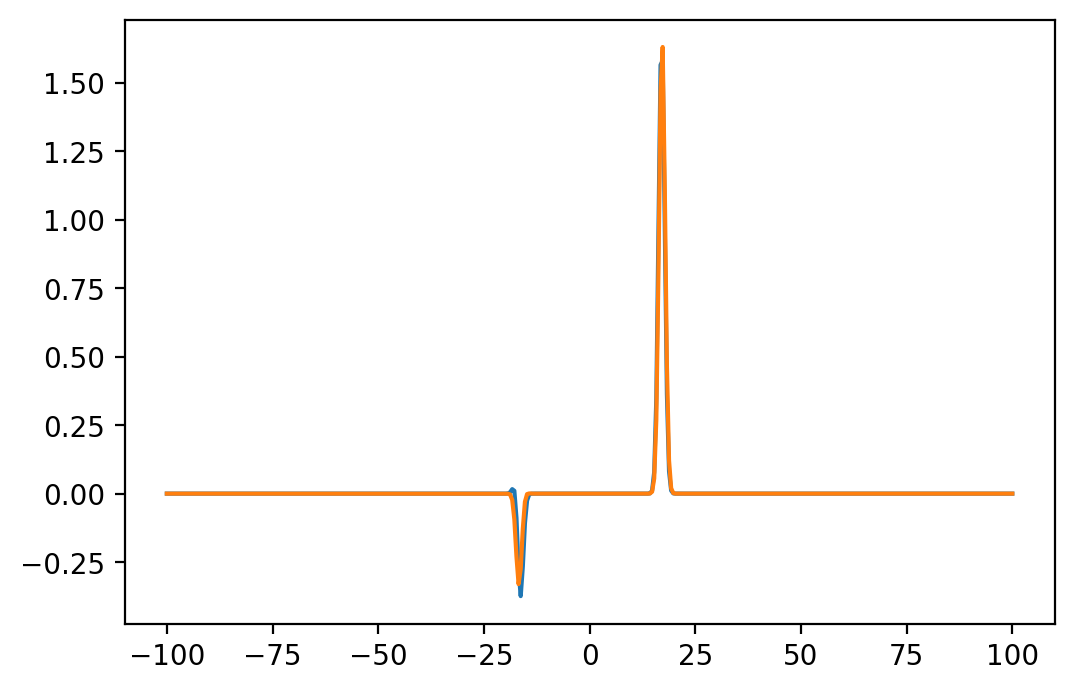

In [166]:
z1 = np.linspace(-100,100,400)
# z2 = np.linspace(0,100,200)
y1 = np.exp(-(z1+15)**2)
y1[z1>0] = 0
y2 = np.exp(-(z1+15)**2)
y2[z1<0] = 0

k = np.fft.fftfreq(400,d=200/400)
Z0 = 1
c = 4
t=8
Cap = 0.2

Zcinv = 1j*c*k*Cap
s0 = Z0*Zcinv/(1+Z0*Zcinv)
sc = 1/(1+Z0*Zcinv)


# [:int(len(k)/2)]
# Y1 = np.fft.fft(y1)



A1 = np.fft.fft(y1,norm='ortho') + np.fft.fft(y2*np.conjugate(sc),norm='ortho')


A2 = np.fft.ifft(-y1*np.conjugate(s0),norm='ortho')

B1 = np.fft.fft(-np.conjugate(-s0*y2),norm='ortho')
B2 = np.fft.ifft(np.conjugate(sc)*y1,norm='ortho') + np.fft.ifft(y2,norm='ortho')



# A1[int(len(z1)/2)+1:] = 0
# A2[int(len(z1)/2)+1:] = 0

# B1[int(len(z1)/2)+1:] = 0
# B2[int(len(z1)/2)+1:] = 0
# B1[:] = 0
# B2[:] = 0

WA1L = np.fft.ifft(A1*np.exp(-1j*2*np.pi*c*k*t),norm='ortho') + np.fft.fft(-s0*A1*np.exp(-1j*2*np.pi*c*k*t),norm='ortho')

WA1R = np.fft.ifft(A1*np.exp(-1j*2*np.pi*c*k*t)*sc,norm='ortho')


WA2l = np.fft.ifft(A2*np.exp(1j*2*np.pi*c*k*t),norm='ortho') + np.fft.fft(-s0*A2*np.exp(1j*2*np.pi*c*k*t),norm='ortho')
WA2r = np.fft.ifft(A2*np.exp(1j*2*np.pi*c*k*t)*sc,norm='ortho')

WB1r = np.fft.fft(B1*np.exp(-1j*2*np.pi*c*k*t),norm='ortho') + np.fft.ifft(-s0*B1*np.exp(-1j*2*np.pi*c*k*t),norm='ortho')

WB2l = np.fft.fft(B2*np.exp(1j*2*np.pi*c*k*t)*sc,norm='ortho')
WB2r = np.fft.fft(B2*np.exp(1j*2*np.pi*c*k*t),norm='ortho') + np.fft.ifft(-s0*B2*np.exp(1j*2*np.pi*c*k*t),norm='ortho')
# B = np.fft.fft(y)
# k1 = np.fft.fftfreq(100,d=20/100)


# WA1L = np.fft.ifft(A1*np.exp(-1j*2*np.pi*c*k*t)) + np.fft.fft(-s0*A1*np.exp(-1j*2*np.pi*c*k*t))
# WA1R = np.fft.ifft(A1*np.exp(-1j*2*np.pi*c*k*t)*sc)

# WA2l = np.fft.ifft(A2*np.exp(1j*2*np.pi*c*k*t)) + np.fft.fft(-s0*A2*np.exp(1j*2*np.pi*c*k*t))
# WA2r = np.fft.ifft(A2*np.exp(1j*2*np.pi*c*k*t)*sc)

# WB1r = np.fft.fft(B1*np.exp(-1j*2*np.pi*c*k*t)) + np.fft.ifft(-s0*B1*np.exp(-1j*2*np.pi*c*k*t))

# WB2l = np.fft.fft(B2*np.exp(1j*2*np.pi*c*k*t)*sc)
# WB2r = np.fft.fft(B2*np.exp(1j*2*np.pi*c*k*t)) + np.fft.ifft(-s0*B2*np.exp(1j*2*np.pi*c*k*t))




# W = np.fft.ifft(B*np.exp(-1j*2*np.pi*c*k*t)-B*np.exp(1j*2*np.pi*c*k*t))


fig,ax = plt.subplots(1,1,dpi=200)
ax.plot(z1,WA1L + WA2l + WB2l)
ax.plot(z1,WA1R + WA2r + WB1r + WB2r)


C:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


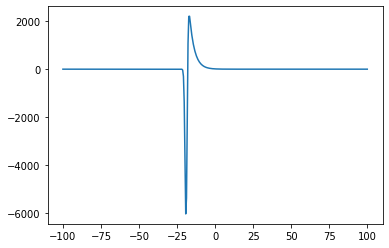

In [148]:
plt.plot(z1,np.fft.fft(-s0*A1*np.exp(-1j*2*np.pi*c*k*t)))

In [168]:
zn

array([-100.        ,  -98.99497487,  -97.98994975,  -96.98492462,
        -95.9798995 ,  -94.97487437,  -93.96984925,  -92.96482412,
        -91.95979899,  -90.95477387,  -89.94974874,  -88.94472362,
        -87.93969849,  -86.93467337,  -85.92964824,  -84.92462312,
        -83.91959799,  -82.91457286,  -81.90954774,  -80.90452261,
        -79.89949749,  -78.89447236,  -77.88944724,  -76.88442211,
        -75.87939698,  -74.87437186,  -73.86934673,  -72.86432161,
        -71.85929648,  -70.85427136,  -69.84924623,  -68.84422111,
        -67.83919598,  -66.83417085,  -65.82914573,  -64.8241206 ,
        -63.81909548,  -62.81407035,  -61.80904523,  -60.8040201 ,
        -59.79899497,  -58.79396985,  -57.78894472,  -56.7839196 ,
        -55.77889447,  -54.77386935,  -53.76884422,  -52.7638191 ,
        -51.75879397,  -50.75376884,  -49.74874372,  -48.74371859,
        -47.73869347,  -46.73366834,  -45.72864322,  -44.72361809,
        -43.71859296,  -42.71356784,  -41.70854271,  -40.70351

In [171]:
B2

array([ 0.12469207+0.00000000e+00j, -0.11030903+5.80725522e-02j,
        0.07050454-1.02697653e-01j, -0.01452859+1.23566507e-01j,
       -0.04462998-1.15909322e-01j,  0.09328127+8.15940483e-02j,
       -0.12022734-2.86684533e-02j,  0.11935987-3.05416334e-02j,
       -0.09105531+8.23251285e-02j,  0.04204631-1.14785430e-01j,
        0.01619063+1.20594622e-01j, -0.07014269-9.86596571e-02j,
        0.10741991+5.43189819e-02j, -0.11962189+1.96297162e-03j,
        0.10424382-5.70825751e-02j, -0.06518648+9.83700253e-02j,
        0.01176769-1.16522733e-01j,  0.04351416+1.07715065e-01j,
       -0.08792444-7.44028933e-02j,  0.11144607+2.46545062e-02j,
       -0.10905304+2.98125211e-02j,  0.08178451-7.64085379e-02j,
       -0.03639018+1.04600776e-01j, -0.01634354-1.08308248e-01j,
        0.06417041+8.72149203e-02j, -0.0962454 -4.67175701e-02j,
        0.1055974 -3.45002126e-03j, -0.09064685+5.15664310e-02j,
        0.05543762-8.66759855e-02j, -0.00856067+1.01095930e-01j,
       -0.03894698-9.2100

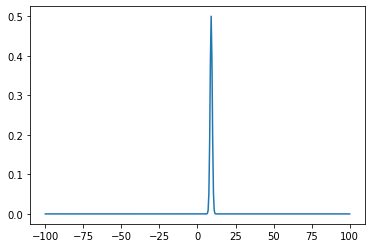

In [405]:
phi1 = [1,0,1,0]
phi1 = [0,1,0,1]

k = np.fft.fftfreq(401,d=200/400)
c = 4
t = 6

zn = np.linspace(-100,100,401)
y = np.exp(-(zn+15)**2)
A1int = np.zeros(len(zn),dtype=np.complex128)
inds = np.argwhere(z<0)
A1int[inds] = y[inds]

inds2 = np.argwhere(z>0)
A1int[inds2] = y[inds2]

A1 = np.fft.fft(A1int, norm='ortho')

B2int = np.zeros(len(zn),dtype=np.complex128)
B2int[inds] = y[inds]
B2int[inds2] = y[inds2]

B2 = np.fft.fft(B2int, norm='ortho')

C = np.zeros(len(B2),dtype=np.complex128)
C[int(len(zn)/2)+1:] = B2[int(len(zn)/2)+1:]
C[:int(len(zn)/2)] = A1[:int(len(zn)/2)]

W = np.fft.ifft(C*np.exp(-2j*np.pi*c*k*t), norm='ortho')


plt.plot(zn,np.real(W))

C:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


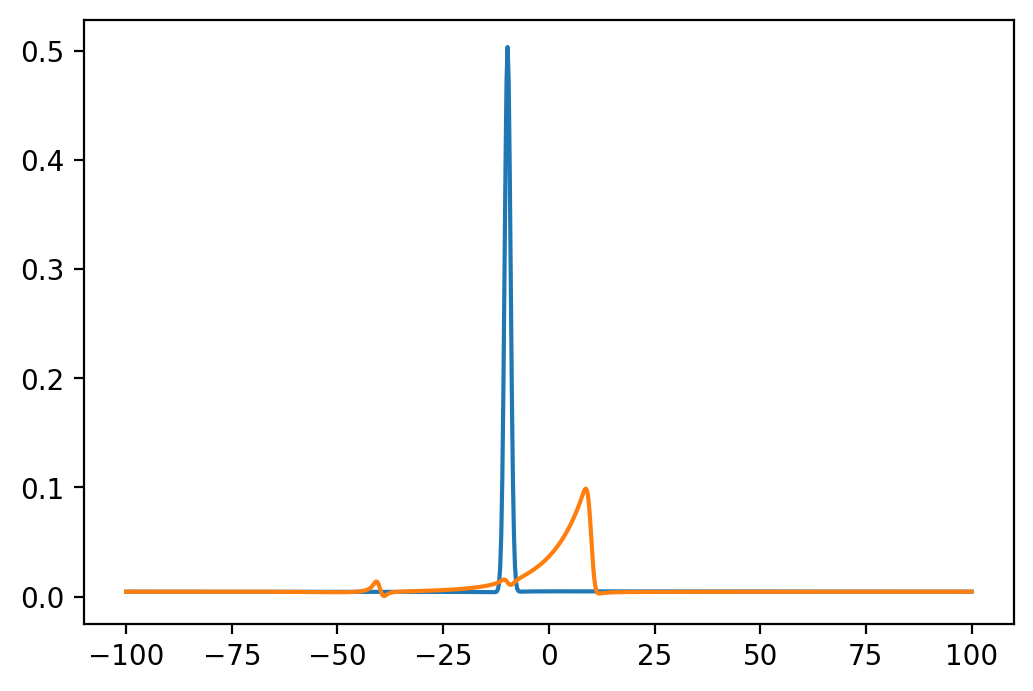

In [577]:
z1 = np.linspace(-100,100,801)
# z2 = np.linspace(0,100,200)
y = np.exp(-(z1+15)**2)




k = np.fft.fftfreq(801,d=200/800)
# k = np.linspace(0,max(k),len(k))
Z0 = 1
c = 5
t=5
Cap = 10e0

Zcinv = -1j*c*k*Cap
s0 = Z0*Zcinv/(1+Z0*Zcinv)
sc = 1/(1+Z0*Zcinv)




A1int = np.zeros(len(z1),dtype=np.complex128)
A2int = np.zeros(len(z1),dtype=np.complex128)
B1int = np.zeros(len(z1),dtype=np.complex128)
B2int = np.zeros(len(z1),dtype=np.complex128)

inds = np.argwhere(z1<0)
inds2 = np.argwhere(z1>0)

A1int[inds2] = y[inds2]
A1int = A1int*np.conjugate(sc)
# A1int = A1int*sc
A1int[inds] = y[inds]
# A1int[inds2] = y[inds2]*np.conjugate

A2int[inds] = y[inds]
# A2int = -A2int*s0
A2int = -A2int*np.conjugate(s0)

B1int[inds2] = y[inds2]
# B1int = -B1int*s0
B1int = -B1int*np.conjugate(s0)

B2int[inds] = y[inds]
# B2int = B2int*sc
B2int = B2int*np.conjugate(sc)
B2int[inds2] = y[inds2]


A1 = np.fft.fft(A1int, norm='ortho')
A2 = np.fft.ifft(A2int, norm='ortho')
B1 = np.fft.ifft(B1int, norm='ortho')
B2 = np.fft.fft(B2int, norm='ortho')


# A1 = np.fft.fft(y1,norm='ortho') + np.fft.fft(y2*np.conjugate(sc),norm='ortho')

# A2 = np.fft.ifft(-y1*np.conjugate(s0),norm='ortho')

# B1 = np.fft.fft(-np.conjugate(-s0*y2),norm='ortho')
# B2 = np.fft.ifft(np.conjugate(sc)*y1,norm='ortho') + np.fft.ifft(y2,norm='ortho')
Cl = np.zeros(len(B2),dtype=np.complex128)
Cl[int(len(zn)/2)+1:] = B2[int(len(zn)/2)+1:]
Cl = Cl*sc
Cl[:int(len(zn)/2)] = A1[:int(len(zn)/2)]

Dl = np.zeros(len(B2),dtype=np.complex128)
Dl[:int(len(zn)/2)] = -A1[:int(len(zn)/2)]
Dl = -Dl*s0
Dl[int(len(zn)/2)+1:] = B2[int(len(zn)/2)+1:]*0

Cr = np.zeros(len(B2),dtype=np.complex128)
Cr[:int(len(zn)/2)] = A1[:int(len(zn)/2)]
Cr = Cr*sc
Cr[int(len(zn)/2)+1:] = B2[int(len(zn)/2)+1:]


Dr = np.zeros(len(B2),dtype=np.complex128)
Dr[int(len(zn)/2)+1:] = -B2[int(len(zn)/2)+1:]
Dr = -Dr*s0
Dr[:int(len(zn)/2)] = -A1[:int(len(zn)/2)]*0



###################
### reflections ###
###################

El = np.zeros(len(B2),dtype=np.complex128)
El[int(len(zn)/2)+1:] = B1[int(len(zn)/2)+1:]
El = El*sc
El[:int(len(zn)/2)] = A2[:int(len(zn)/2)]

Fl = np.zeros(len(B2),dtype=np.complex128)
Fl[:int(len(zn)/2)] = -A2[:int(len(zn)/2)]
Fl = -Fl*s0
Fl[int(len(zn)/2)+1:] = B1[int(len(zn)/2)+1:]*0

Er = np.zeros(len(B2),dtype=np.complex128)
Er[:int(len(zn)/2)] = A2[:int(len(zn)/2)]
Er = Er*sc
Er[int(len(zn)/2)+1:] = B1[int(len(zn)/2)+1:]


Fr = np.zeros(len(B2),dtype=np.complex128)
Fr[int(len(zn)/2)+1:] = -B1[int(len(zn)/2)+1:]
Fr = -Dr*s0
Fr[:int(len(zn)/2)] = -A2[:int(len(zn)/2)]*0




Wl = np.fft.fft(Cl*np.exp(-2j*np.pi*c*k*t), norm='ortho') 
# Wl -= np.fft.fft(Dl*np.exp(-2j*np.pi*c*k*t), norm='ortho') 
# Wl -= np.fft.fft(El*np.exp(2j*np.pi*c*k*t), norm='ortho')
# Wl = np.fft.ifft(Fl*np.exp(2j*np.pi*c*k*t), norm='ortho') 

# Wr = np.fft.ifft(Cr*np.exp(-2j*np.pi*c*k*t), norm='ortho') 
# Wr -= np.fft.fft(Dr*np.exp(-2j*np.pi*c*k*t), norm='ortho') 
# Wr += np.fft.fft(Er*np.exp(2j*np.pi*c*k*t), norm='ortho') 
Wr -= np.fft.ifft(Fr*np.exp(2j*np.pi*c*k*t), norm='ortho') 

# WA1L = np.fft.ifft(A1*np.exp(-1j*2*np.pi*c*k*t),norm='ortho') + np.fft.fft(-s0*A1*np.exp(-1j*2*np.pi*c*k*t),norm='ortho')

# WA1R = np.fft.ifft(A1*np.exp(-1j*2*np.pi*c*k*t)*sc,norm='ortho')


# WA2l = np.fft.ifft(A2*np.exp(1j*2*np.pi*c*k*t),norm='ortho') + np.fft.fft(-s0*A2*np.exp(1j*2*np.pi*c*k*t),norm='ortho')
# WA2r = np.fft.ifft(A2*np.exp(1j*2*np.pi*c*k*t)*sc,norm='ortho')

# WB1r = np.fft.fft(B1*np.exp(-1j*2*np.pi*c*k*t),norm='ortho') + np.fft.ifft(-s0*B1*np.exp(-1j*2*np.pi*c*k*t),norm='ortho')

# WB2l = np.fft.fft(B2*np.exp(1j*2*np.pi*c*k*t)*sc,norm='ortho')
# WB2r = np.fft.fft(B2*np.exp(1j*2*np.pi*c*k*t),norm='ortho') + np.fft.ifft(-s0*B2*np.exp(1j*2*np.pi*c*k*t),norm='ortho')





# W = np.fft.ifft(B*np.exp(-1j*2*np.pi*c*k*t)-B*np.exp(1j*2*np.pi*c*k*t))


fig,ax = plt.subplots(1,1,dpi=200)
plt.plot(z1,Wl)
plt.plot(z1,Wr)


In [457]:
k

array([ 0.        ,  0.00499376,  0.00998752,  0.01498127,  0.01997503,
        0.02496879,  0.02996255,  0.0349563 ,  0.03995006,  0.04494382,
        0.04993758,  0.05493134,  0.05992509,  0.06491885,  0.06991261,
        0.07490637,  0.07990012,  0.08489388,  0.08988764,  0.0948814 ,
        0.09987516,  0.10486891,  0.10986267,  0.11485643,  0.11985019,
        0.12484395,  0.1298377 ,  0.13483146,  0.13982522,  0.14481898,
        0.14981273,  0.15480649,  0.15980025,  0.16479401,  0.16978777,
        0.17478152,  0.17977528,  0.18476904,  0.1897628 ,  0.19475655,
        0.19975031,  0.20474407,  0.20973783,  0.21473159,  0.21972534,
        0.2247191 ,  0.22971286,  0.23470662,  0.23970037,  0.24469413,
        0.24968789,  0.25468165,  0.25967541,  0.26466916,  0.26966292,
        0.27465668,  0.27965044,  0.28464419,  0.28963795,  0.29463171,
        0.29962547,  0.30461923,  0.30961298,  0.31460674,  0.3196005 ,
        0.32459426,  0.32958801,  0.33458177,  0.33957553,  0.34

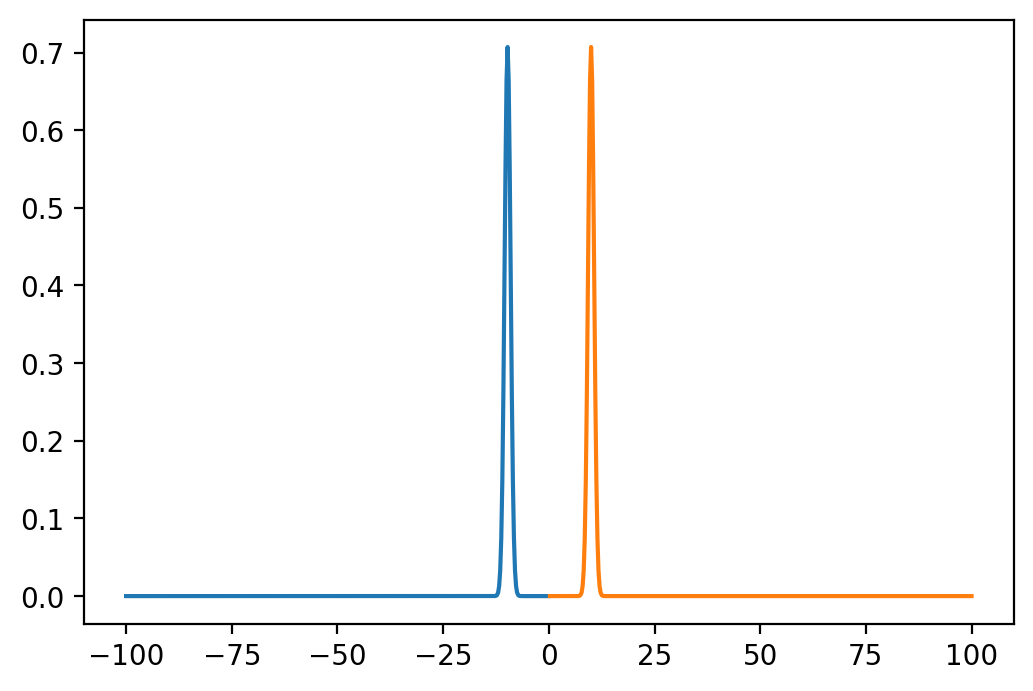

In [11]:
z1 = np.linspace(-100,100,801)
# z2 = np.linspace(0,100,200)
y = np.exp(-(z1+15)**2)




k = np.fft.fftfreq(801,d=200/800)
# k = np.linspace(0,max(k),len(k))
# Z0 = 1
c = 5
t=5
# Cap = 10e0

# Zcinv = -1j*c*k*Cap
# s0 = Z0*Zcinv/(1+Z0*Zcinv)
# sc = 1/(1+Z0*Zcinv)




A1int = np.zeros(len(z1),dtype=np.complex128)

B2int = np.zeros(len(z1),dtype=np.complex128)

inds = np.argwhere(z1<0)
inds2 = np.argwhere(z1>0)

A1int[inds] = y[inds]
A1int[inds2] = y[inds2]/np.sqrt(2)



B2int[inds] = y[inds]*1/np.sqrt(2)
B2int[inds2] = y[inds2]


A1 = np.fft.fft(A1int, norm='ortho')

B2 = np.fft.ifft(B2int, norm='ortho')


#################
### Solutions ###
#################
C1 = A1*np.exp(-2j*np.pi*c*k*t)
C2 = B2*np.exp(-2j*np.pi*c*k*t)

######################
### Eigenfunctions ###
######################
# C1[int(len(zn)/2)+1:] = 0
# C2[int(len(zn)/2)+1:] = 0
WL = np.fft.ifft(C1, norm='ortho') + np.fft.fft(-1j*C1/np.sqrt(2), norm='ortho')# + np.fft.ifft(C2/np.sqrt(2), norm='ortho')
WR =  np.fft.ifft(C1/np.sqrt(2), norm='ortho')

fig,ax = plt.subplots(1,1,dpi=200)
plt.plot(z1[inds],np.abs(WL)[inds])
plt.plot(z1[inds2],np.abs(WR)[inds2])
# plt.plot(z1,WL)
# plt.plot(z1,WR)


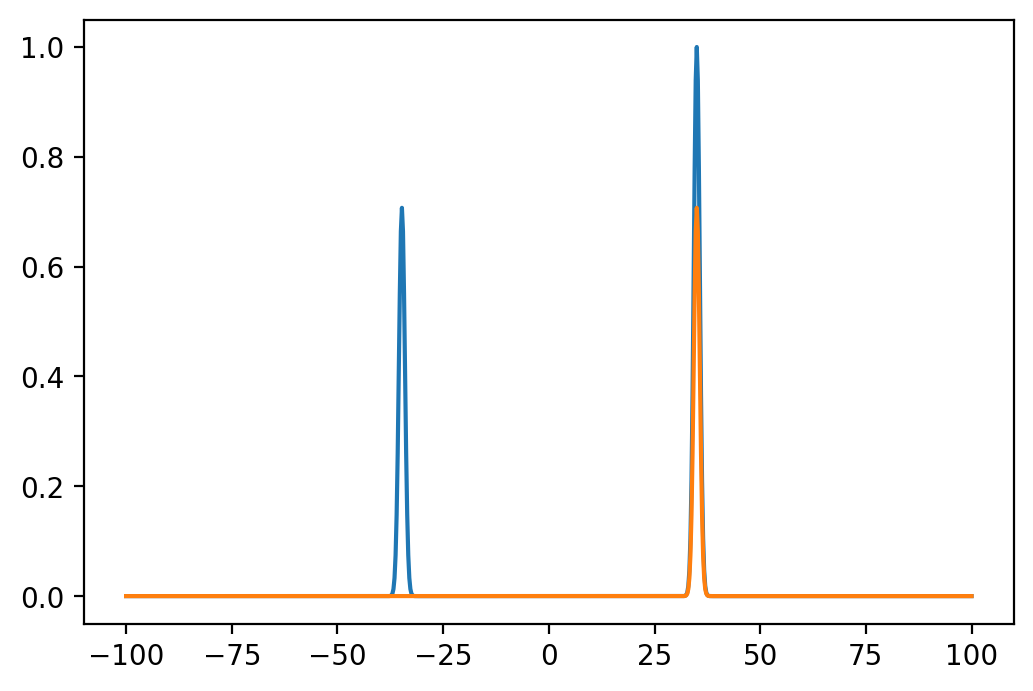

In [22]:
z1 = np.linspace(-100,100,801)
# z2 = np.linspace(0,100,200)
y = np.exp(-(z1+15)**2)




k = np.fft.fftfreq(801,d=200/800)
# k = np.linspace(0,max(k),len(k))
# Z0 = 1
c = 5
t=-10
# Cap = 10e0

# Zcinv = -1j*c*k*Cap
# s0 = Z0*Zcinv/(1+Z0*Zcinv)
# sc = 1/(1+Z0*Zcinv)




A1int = np.zeros(len(z1),dtype=np.complex128)

B2int = np.zeros(len(z1),dtype=np.complex128)

inds = np.argwhere(z1<0)
inds2 = np.argwhere(z1>0)

A1int[inds] = y[inds]/np.sqrt(2)*1j
A1int[inds2] = y[inds2]/np.sqrt(2)



B2int[inds] = y[inds]*1/np.sqrt(2)
B2int[inds2] = y[inds2]


A1 = np.fft.ifft(A1int, norm='ortho')

B2 = np.fft.ifft(B2int, norm='ortho')


#################
### Solutions ###
#################
C1 = A1*np.exp(-2j*np.pi*c*k*t)
C2 = B2*np.exp(-2j*np.pi*c*k*t)

######################
### Eigenfunctions ###
######################
# C1[int(len(zn)/2)+1:] = 0
# C2[int(len(zn)/2)+1:] = 0
WL = np.fft.ifft(C1, norm='ortho') + np.fft.fft(-1j*C1/np.sqrt(2), norm='ortho') + np.fft.fft(C2/np.sqrt(2), norm='ortho')
WR =  np.fft.ifft(C1/np.sqrt(2), norm='ortho') + np.fft.ifft(-1j*C2/np.sqrt(2), norm='ortho') + np.fft.fft(C2, norm='ortho')

fig,ax = plt.subplots(1,1,dpi=200)
plt.plot(z1,np.abs(WL))
plt.plot(z1,np.abs(WR))
# plt.plot(z1,WL)
# plt.plot(z1,WR)


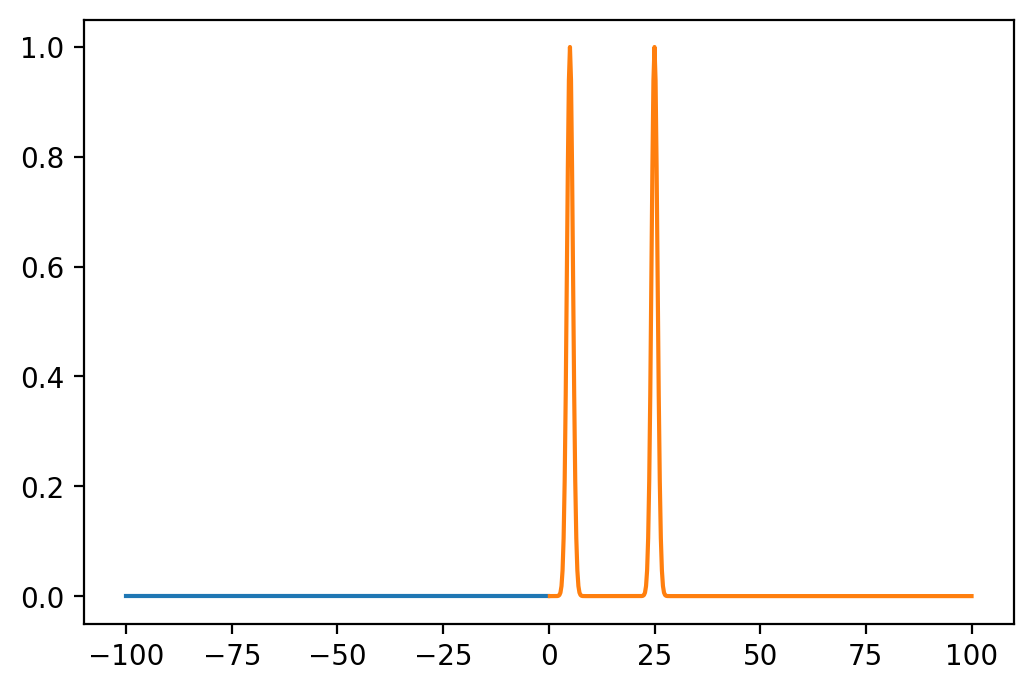

In [12]:
z1 = np.linspace(-100,100,801)
# z2 = np.linspace(0,100,200)
yright = np.exp(-(z1-15)**2)
yleft = np.exp(-(z1-15)**2)



k = np.fft.fftfreq(801,d=200/800)
# k = np.linspace(0,max(k),len(k))
# Z0 = 1
c = 5
t=2
# Cap = 10e0

# Zcinv = -1j*c*k*Cap
# s0 = Z0*Zcinv/(1+Z0*Zcinv)
# sc = 1/(1+Z0*Zcinv)




A1intright = np.zeros(len(z1),dtype=np.complex128)
A1intleft = np.zeros(len(z1),dtype=np.complex128)

B2intright = np.zeros(len(z1),dtype=np.complex128)
B2intleft = np.zeros(len(z1),dtype=np.complex128)

B2int = np.zeros(len(z1),dtype=np.complex128)

inds = np.argwhere(z1<0)
inds2 = np.argwhere(z1>0)

A1intleft[inds] = yleft[inds]/np.sqrt(2)*1j
A1intleft[inds2] = 0

A1intright[inds] = yright[inds]
A1intright[inds2] = yright[inds2]/np.sqrt(2)



B2intleft[inds] = yleft[inds]*1/np.sqrt(2)
B2intleft[inds2] = yleft[inds2]

B2intright[inds] = 0
B2intright[inds2] = 1j*yright[inds2]/np.sqrt(2)



A1 = np.fft.ifft(A1intleft, norm='ortho') + np.fft.fft(A1intright, norm='ortho')

B2 = np.fft.ifft(B2intleft, norm='ortho') + np.fft.fft(B2intright, norm='ortho')


#################
### Solutions ###
#################
C1 = A1*np.exp(-2j*np.pi*c*k*t)
C2 = B2*np.exp(-2j*np.pi*c*k*t)

######################
### Eigenfunctions ###
######################
# C1[int(len(zn)/2)+1:] = 0
# C2[int(len(zn)/2)+1:] = 0
WL = np.fft.ifft(C1, norm='ortho') + np.fft.fft(-1j*C1/np.sqrt(2), norm='ortho') + np.fft.fft(C2/np.sqrt(2), norm='ortho')
WR =  np.fft.ifft(C1/np.sqrt(2), norm='ortho') + np.fft.ifft(-1j*C2/np.sqrt(2), norm='ortho') + np.fft.fft(C2, norm='ortho')

fig,ax = plt.subplots(1,1,dpi=200)
plt.plot(z1[inds],np.abs(WL[inds]))
plt.plot(z1[inds2],np.abs(WR[inds2]))
# plt.plot(z1,WL)
# plt.plot(z1,WR)


In [24]:
sc

array([1.        +0.j        , 0.99937695+0.02495323j,
       0.99751244+0.04981336j, 0.99442034+0.07448842j,
       0.99012347+0.09888874j, 0.98465319+0.12292799j,
       0.97804881+0.14652417j, 0.97035697+0.16960047j,
       0.96163075+0.19208604j, 0.95192885+0.2139166j ,
       0.94131464+0.23503487j, 0.92985517+0.25539093j,
       0.91762026+0.2749424j , 0.90468147+0.29365441j,
       0.89111126+0.31149957j, 0.87698213+0.32845772j,
       0.86236578+0.34451567j, 0.84733248+0.35966672j,
       0.83195043+0.3739103j , 0.81628522+0.38725142j,
       0.80039945+0.3997001j , 0.78435234+0.41127089j,
       0.76819951+0.42198225j, 0.75199279+0.43185603j,
       0.73578012+0.44091693j, 0.71960552+0.44919196j,
       0.7035091 +0.45671003j, 0.68752712+0.46350143j,
       0.67169214+0.4695975j , 0.65603307+0.47503019j,
       0.64057544+0.47983179j, 0.6253415 +0.48403462j,
       0.61035045+0.48767077j, 0.59561864+0.49077192j,
       0.5811598 +0.49336912j, 0.56698518+0.49549267j,
       0.5

C:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


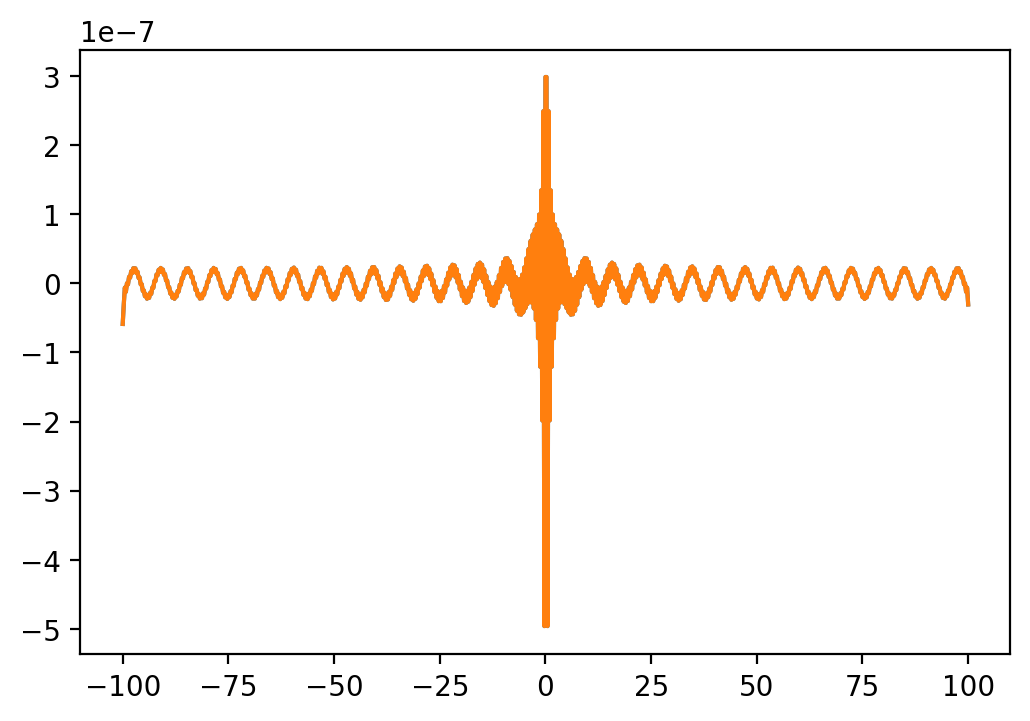

In [8]:
z1 = np.linspace(-100,100,801)
# z2 = np.linspace(0,100,200)
yright = np.exp(1j*z1)




k = np.fft.fftfreq(801,d=200/800)
# k = np.linspace(0,max(k),len(k))
Z0 = 1
c = 5
t=0
Cap = 10e-8

Zcinv = -1j*c*k*Cap
s0 = Z0*Zcinv/(1+Z0*Zcinv)
sc = 1/(1+Z0*Zcinv)




A1intright = np.zeros(len(z1),dtype=np.complex128)
# B2intleft = np.zeros(len(z1),dtype=np.complex128)

inds = np.argwhere(z1<0)
inds2 = np.argwhere(z1>0)

A1intright[inds] = yright[inds]

A1intright[inds2] = yright[inds2]

A1 = np.fft.fft(A1intright, norm='ortho')

B2 = np.fft.ifft(A1intright, norm='ortho')
C1 = A1*np.exp(-2j*np.pi*c*k*t)

C2 = -B2*np.exp(-2j*np.pi*c*k*t)

WL = np.fft.ifft(C1, norm='ortho') + np.fft.fft(-s0*C1, norm='ortho') + np.fft.fft(C2*sc, norm='ortho')
WR = np.fft.ifft(C1*sc, norm='ortho') + np.fft.ifft(-C2*s0, norm='ortho') + np.fft.fft(C2, norm='ortho')

fig,ax = plt.subplots(1,1,dpi=200)
plt.plot(z1,WL)
plt.plot(z1,WR)
# plt.plot(z1[inds],WL[inds])
# plt.plot(z1[inds2],WR[inds2])

array([1.+0.00000000e+00j, 1.+2.49687890e-09j, 1.+4.99375780e-09j,
       1.+7.49063670e-09j, 1.+9.98751561e-09j, 1.+1.24843945e-08j,
       1.+1.49812734e-08j, 1.+1.74781523e-08j, 1.+1.99750312e-08j,
       1.+2.24719101e-08j, 1.+2.49687890e-08j, 1.+2.74656679e-08j,
       1.+2.99625468e-08j, 1.+3.24594257e-08j, 1.+3.49563046e-08j,
       1.+3.74531835e-08j, 1.+3.99500624e-08j, 1.+4.24469413e-08j,
       1.+4.49438202e-08j, 1.+4.74406991e-08j, 1.+4.99375780e-08j,
       1.+5.24344569e-08j, 1.+5.49313358e-08j, 1.+5.74282147e-08j,
       1.+5.99250936e-08j, 1.+6.24219725e-08j, 1.+6.49188514e-08j,
       1.+6.74157303e-08j, 1.+6.99126092e-08j, 1.+7.24094881e-08j,
       1.+7.49063670e-08j, 1.+7.74032459e-08j, 1.+7.99001248e-08j,
       1.+8.23970037e-08j, 1.+8.48938826e-08j, 1.+8.73907615e-08j,
       1.+8.98876404e-08j, 1.+9.23845194e-08j, 1.+9.48813983e-08j,
       1.+9.73782772e-08j, 1.+9.98751561e-08j, 1.+1.02372035e-07j,
       1.+1.04868914e-07j, 1.+1.07365793e-07j, 1.+1.09862672e-